In [173]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('Food Waste data and research - by country.csv')
df2 = pd.read_csv('global_food_wastage_dataset.csv')

In [175]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [176]:
df2.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [177]:
query = """
SELECT Country, [Household estimate (tonnes/year)]
FROM df
ORDER BY [Household estimate (tonnes/year)] DESC
LIMIT 10
"""

In [178]:
result = ps.sqldf(query, locals())

In [179]:
print(result)

                    Country  Household estimate (tonnes/year)
0                     China                          91646213
1                     India                          68760163
2                   Nigeria                          37941470
3                 Indonesia                          20938252
4  United States of America                          19359951
5                  Pakistan                          15947645
6                    Brazil                          12578308
7                    Mexico                          11979364
8                Bangladesh                          10618233
9                  Ethiopia                          10327236


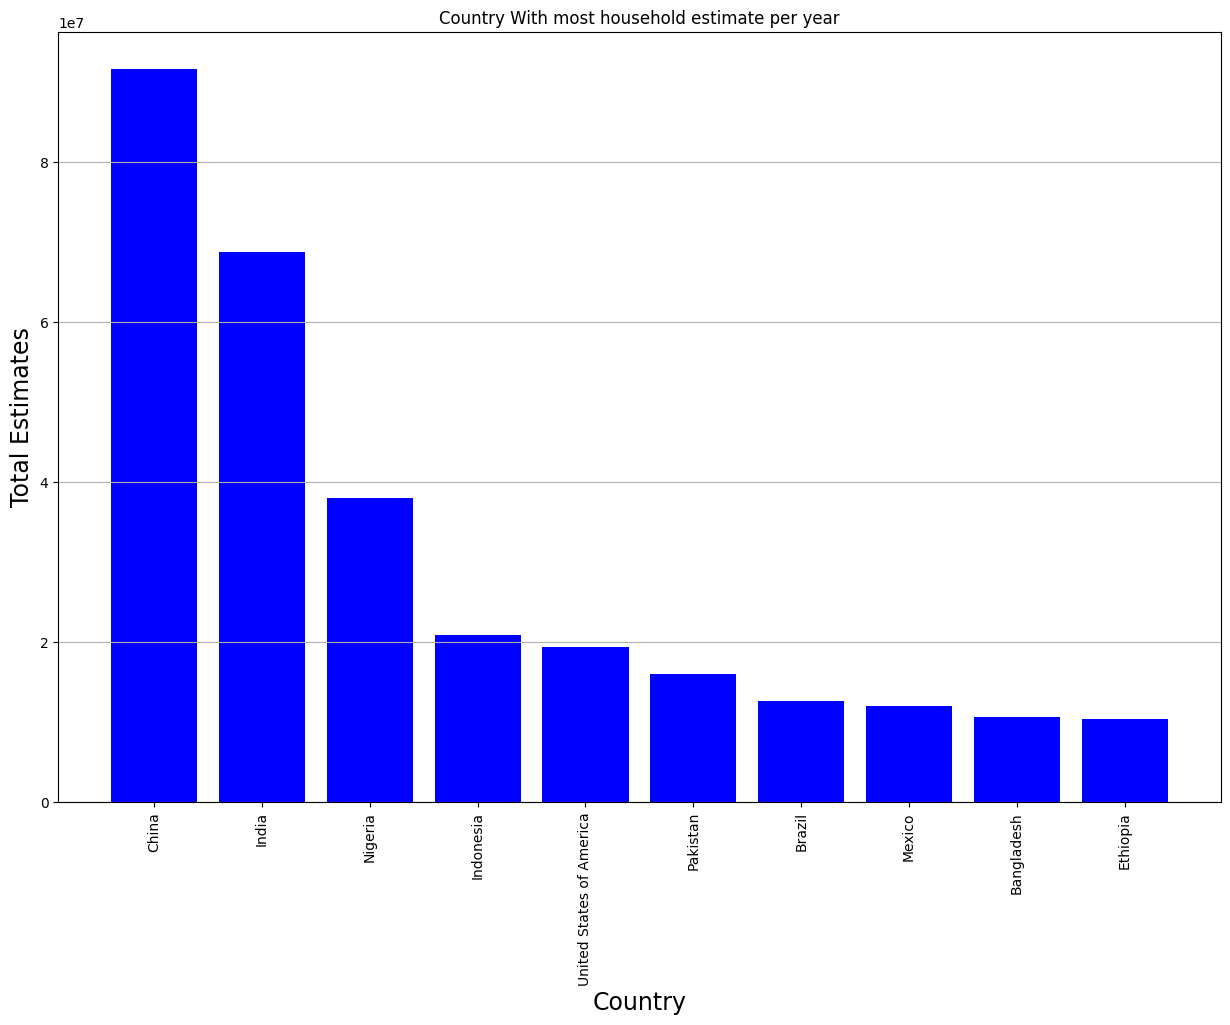

In [180]:
plt.figure(figsize=(15,10))
plt.bar(result["Country"], result['Household estimate (tonnes/year)'], color = 'Blue')
plt.title('Country With most household estimate per year', fontsize=12)
plt.xlabel("Country",fontsize=17)
plt.ylabel("Total Estimates", fontsize=17)
plt.xticks(rotation=90)
plt.grid(axis='y')

In [181]:
query2 = """
SELECT region, AVG([combined figures (kg/capita/year)]) as AVG_CF
FROM df
GROUP BY [combined figures (kg/capita/year)]
LIMIT 10
"""

In [182]:
result = ps.sqldf(query2, locals())

In [183]:
print(result)

                      Region  AVG_CF
0            Southern Europe    61.0
1             Eastern Europe    75.0
2             Western Europe    76.0
3             Western Europe    80.0
4              Southern Asia    84.0
5             Western Europe    87.0
6               Eastern Asia    88.0
7  Australia and New Zealand    90.0
8              Southern Asia    94.0
9             Eastern Europe    95.0


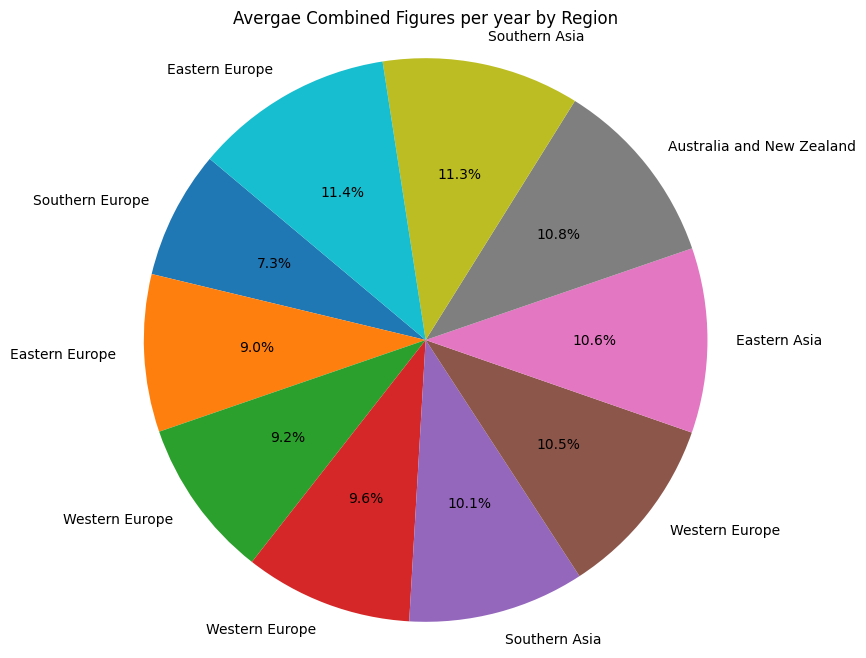

In [184]:
plt.figure(figsize= (8, 8))
plt.pie(result['AVG_CF'], labels=result['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Avergae Combined Figures per year by Region')
plt.axis('equal')
plt.show()

In [185]:
query3 = """
SELECT Region , SUM([Food service estimate (tonnes/year)]) as Total_food_service_waste
FROM df
GROUP BY region
"""

In [186]:
result = ps.sqldf(query3, locals())

In [187]:
print(result)

                             Region  Total_food_service_waste
0         Australia and New Zealand                    668646
1                      Central Asia                   2024174
2                      Eastern Asia                  69563642
3                    Eastern Europe                   7940570
4   Latin America and the Caribbean                  17820860
5                         Melanesia                    301291
6                        Micronesia                     14500
7                   Northern Africa                   6668672
8                  Northern America                  21894490
9                   Northern Europe                   2022283
10                        Polynesia                     15801
11               South-eastern Asia                  20268579
12                    Southern Asia                  49071377
13                  Southern Europe                   3733504
14               Sub-Saharan Africa                  29629194
15      

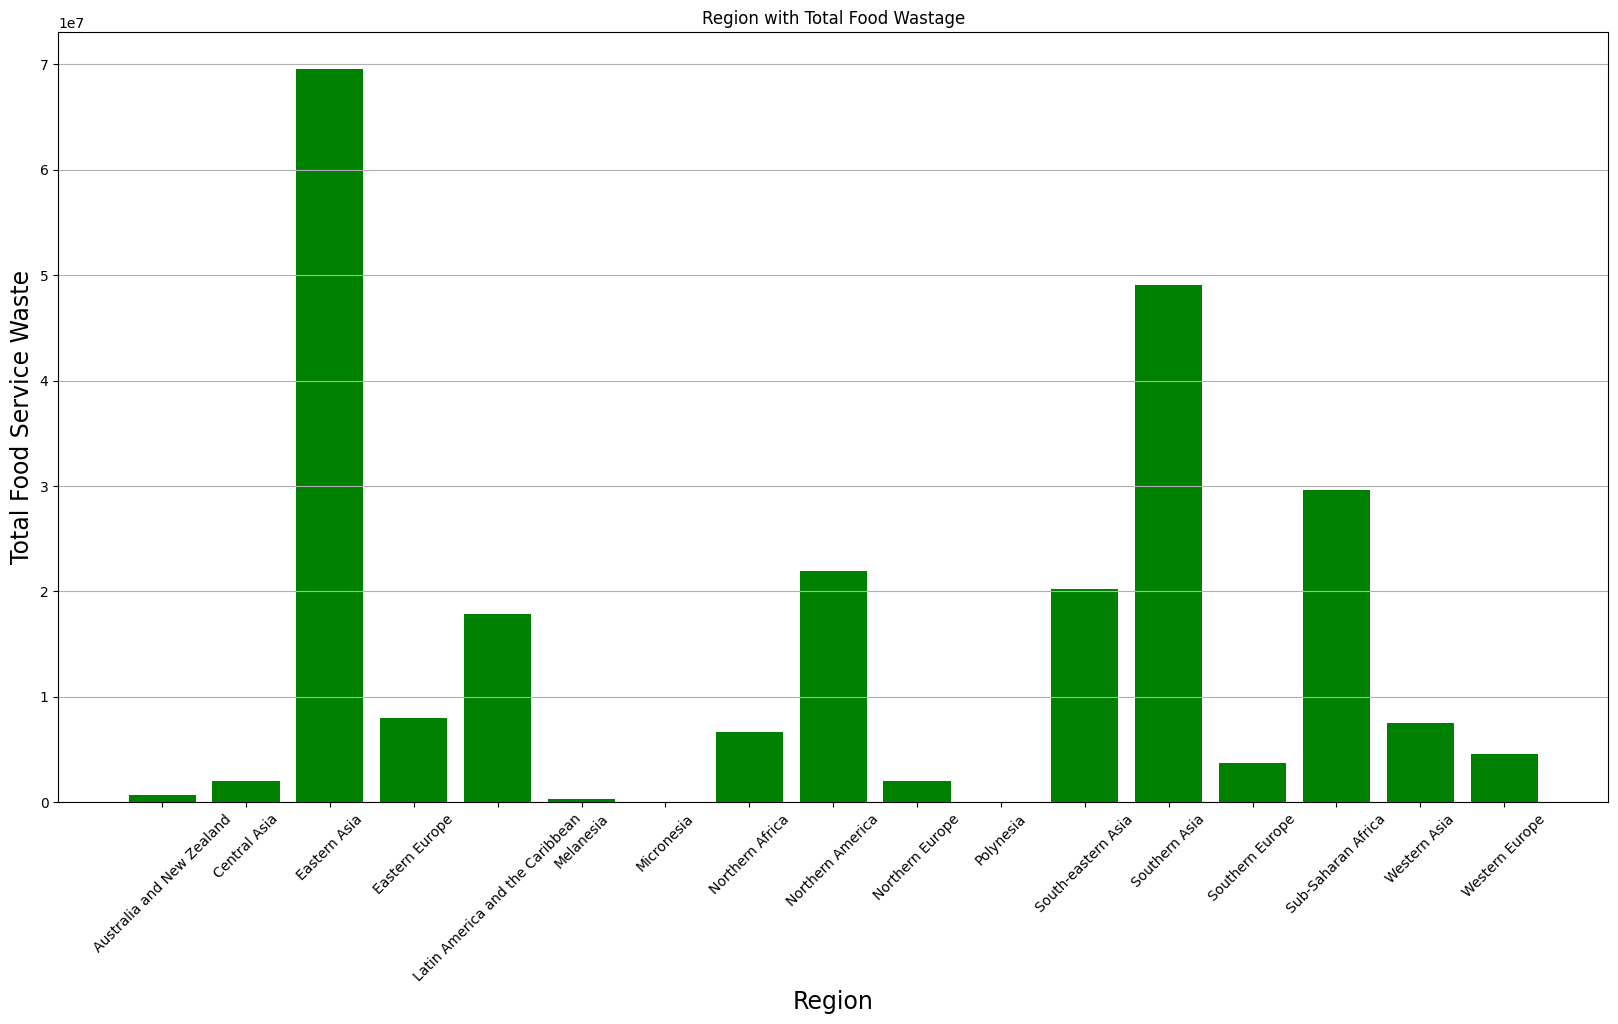

In [188]:
plt.figure(figsize=(20,10))
plt.bar(result["Region"], result['Total_food_service_waste'], color = 'Green')
plt.title('Region with Total Food Wastage', fontsize=12)
plt.xlabel("Region",fontsize=17)
plt.ylabel("Total Food Service Waste", fontsize=17)
plt.xticks(rotation=45)
plt.grid(axis='y')

In [189]:
#Countries with low househuld but high food service waste
query4 = """
SELECT Country,[Household estimate (kg/capita/year)] + [Food service estimate (kg/capita/year)] AS Total_waste
FROM df
ORDER BY Total_waste DESC
LIMIT 11
"""

In [190]:
result = ps.sqldf(query4, locals())

In [191]:
print(result)

                    Country  Total_waste
0                   Nigeria          217
1                    Rwanda          192
2                  Malaysia          181
3                    Greece          168
4                   Bahrain          158
5                     Malta          155
6                      Iraq          148
7   United Rep. of Tanzania          147
8                   Lebanon          133
9      Syrian Arab Republic          132
10                    Yemen          132


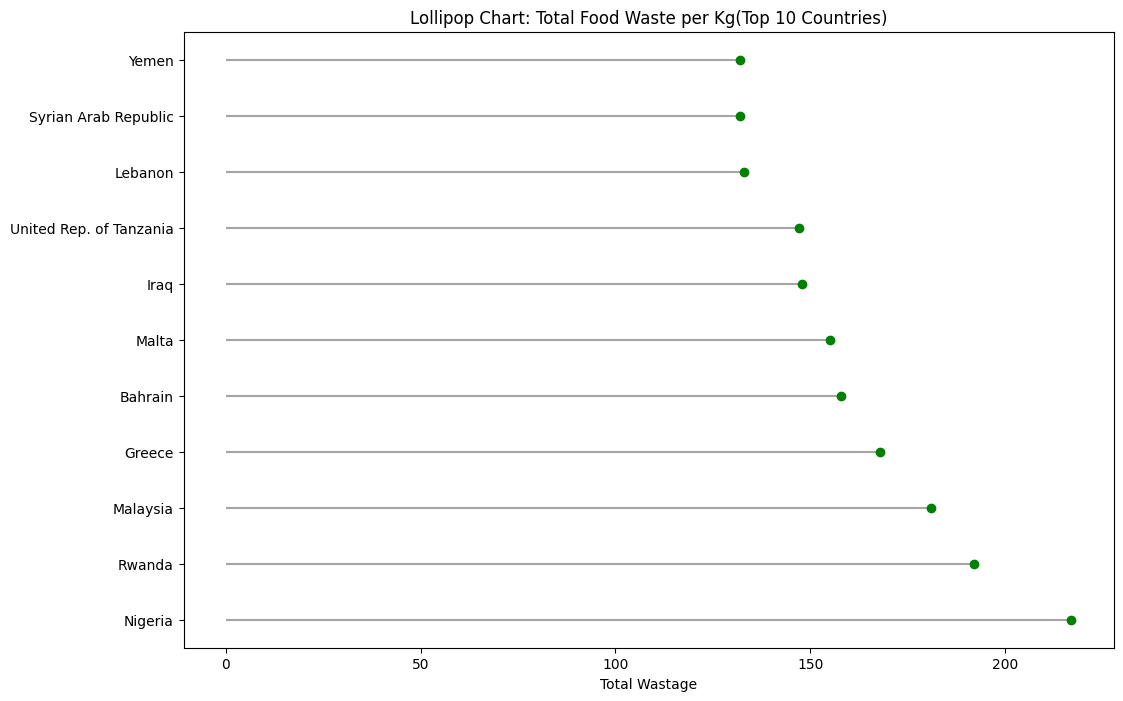

In [192]:
plt.figure(figsize=(12, 8))
plt.hlines(y=result['Country'], xmin=0, xmax=result['Total_waste'], color='gray', alpha=0.7)
plt.plot(result['Total_waste'], result['Country'], "o", color='green')
plt.title('Lollipop Chart: Total Food Waste per Kg(Top 10 Countries)')
plt.xlabel("Total Wastage")
plt.show()

In [193]:
#Find countries where retail wastage is unusually low
query5 = """
SELECT Country , [Retail estimate (kg/capita/year)]
FROM df
WHERE [Retail estimate (kg/capita/year)] < 15
ORDER BY [Retail estimate (kg/capita/year)]
LIMIT 11
"""

In [194]:
result = ps.sqldf(query5, locals())

In [195]:
print(result)

           Country  Retail estimate (kg/capita/year)
0      New Zealand                                 3
1            Italy                                 4
2   United Kingdom                                 4
3          Estonia                                 5
4          Germany                                 6
5           Greece                                 7
6       Luxembourg                                 7
7         Slovenia                                 7
8        Australia                                 9
9          Austria                                 9
10           Japan                                 9


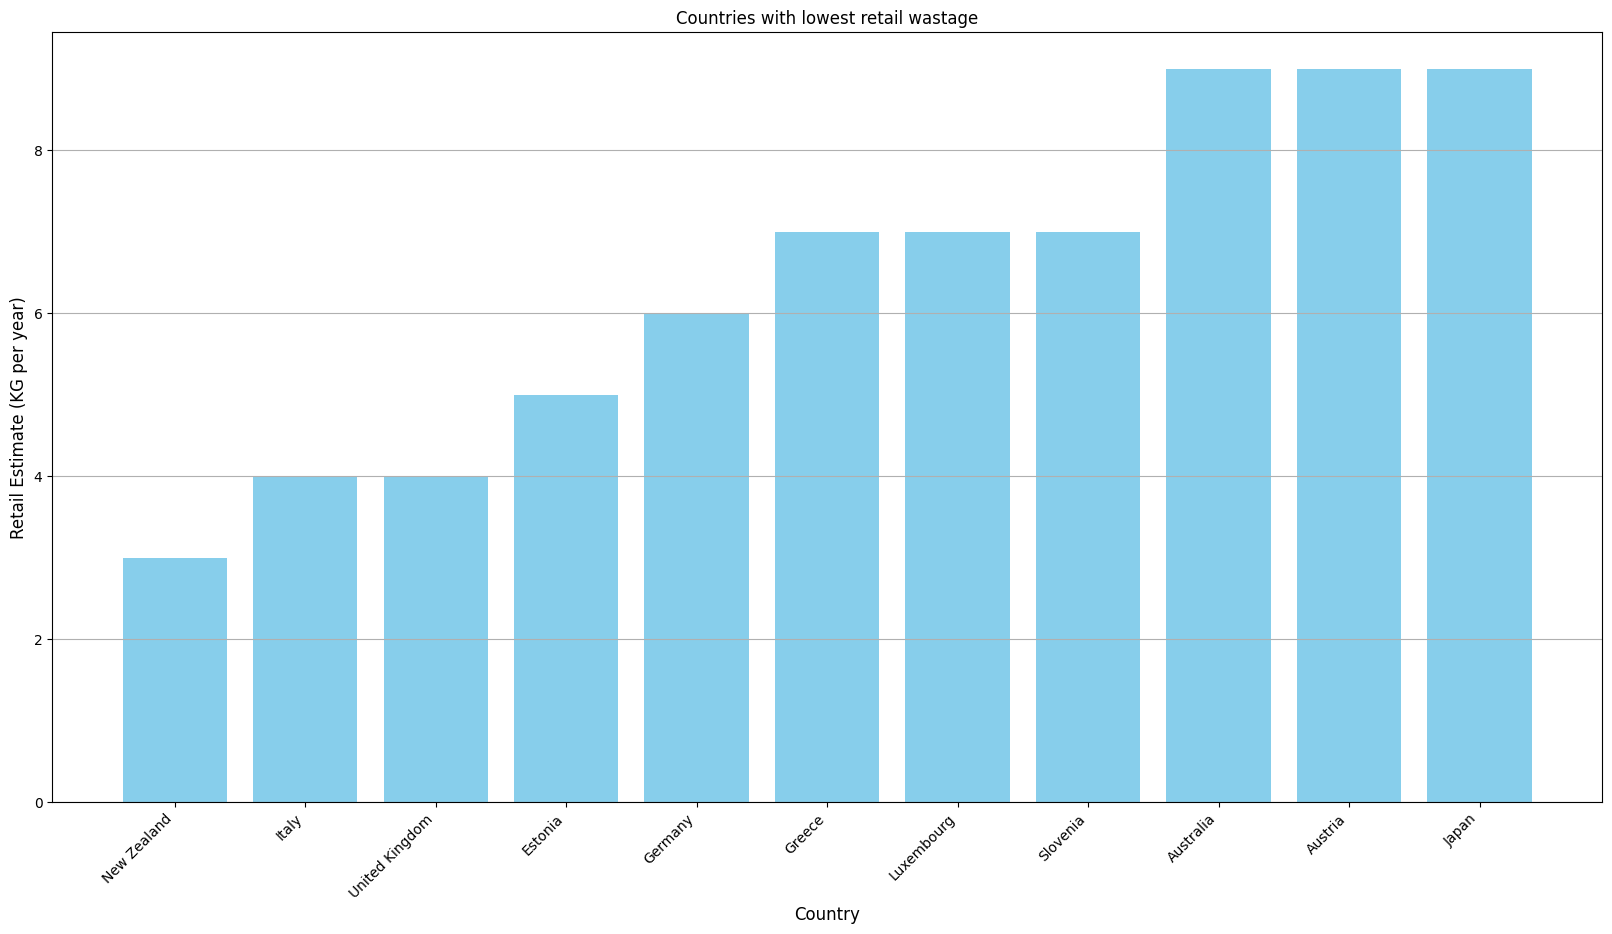

In [196]:
plt.figure(figsize=(20,10))
plt.bar(result["Country"], result['Retail estimate (kg/capita/year)'], color = 'Skyblue')
plt.title('Countries with lowest retail wastage', fontsize=12)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Retail Estimate (KG per year)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

In [197]:
#Countries Where Food Waste Service Close to Household
query6 = """
SELECT Country, [Household estimate (kg/capita/year)], [Food service estimate (kg/capita/year)]
FROM df
WHERE ABS([Household estimate (kg/capita/year)] - [Food service estimate (kg/capita/year)]) < 10
"""

In [198]:
result = ps.sqldf(query6, locals())

In [199]:
print(result)

                    Country  Household estimate (kg/capita/year)  \
0                   Ireland                                   55   
1                  Malaysia                                   91   
2        Russian Federation                                   33   
3  United States of America                                   59   

   Food service estimate (kg/capita/year)  
0                                      56  
1                                      90  
2                                      28  
3                                      64  


In [200]:
x = np.arange(len(result['Country']))
width = 0.35

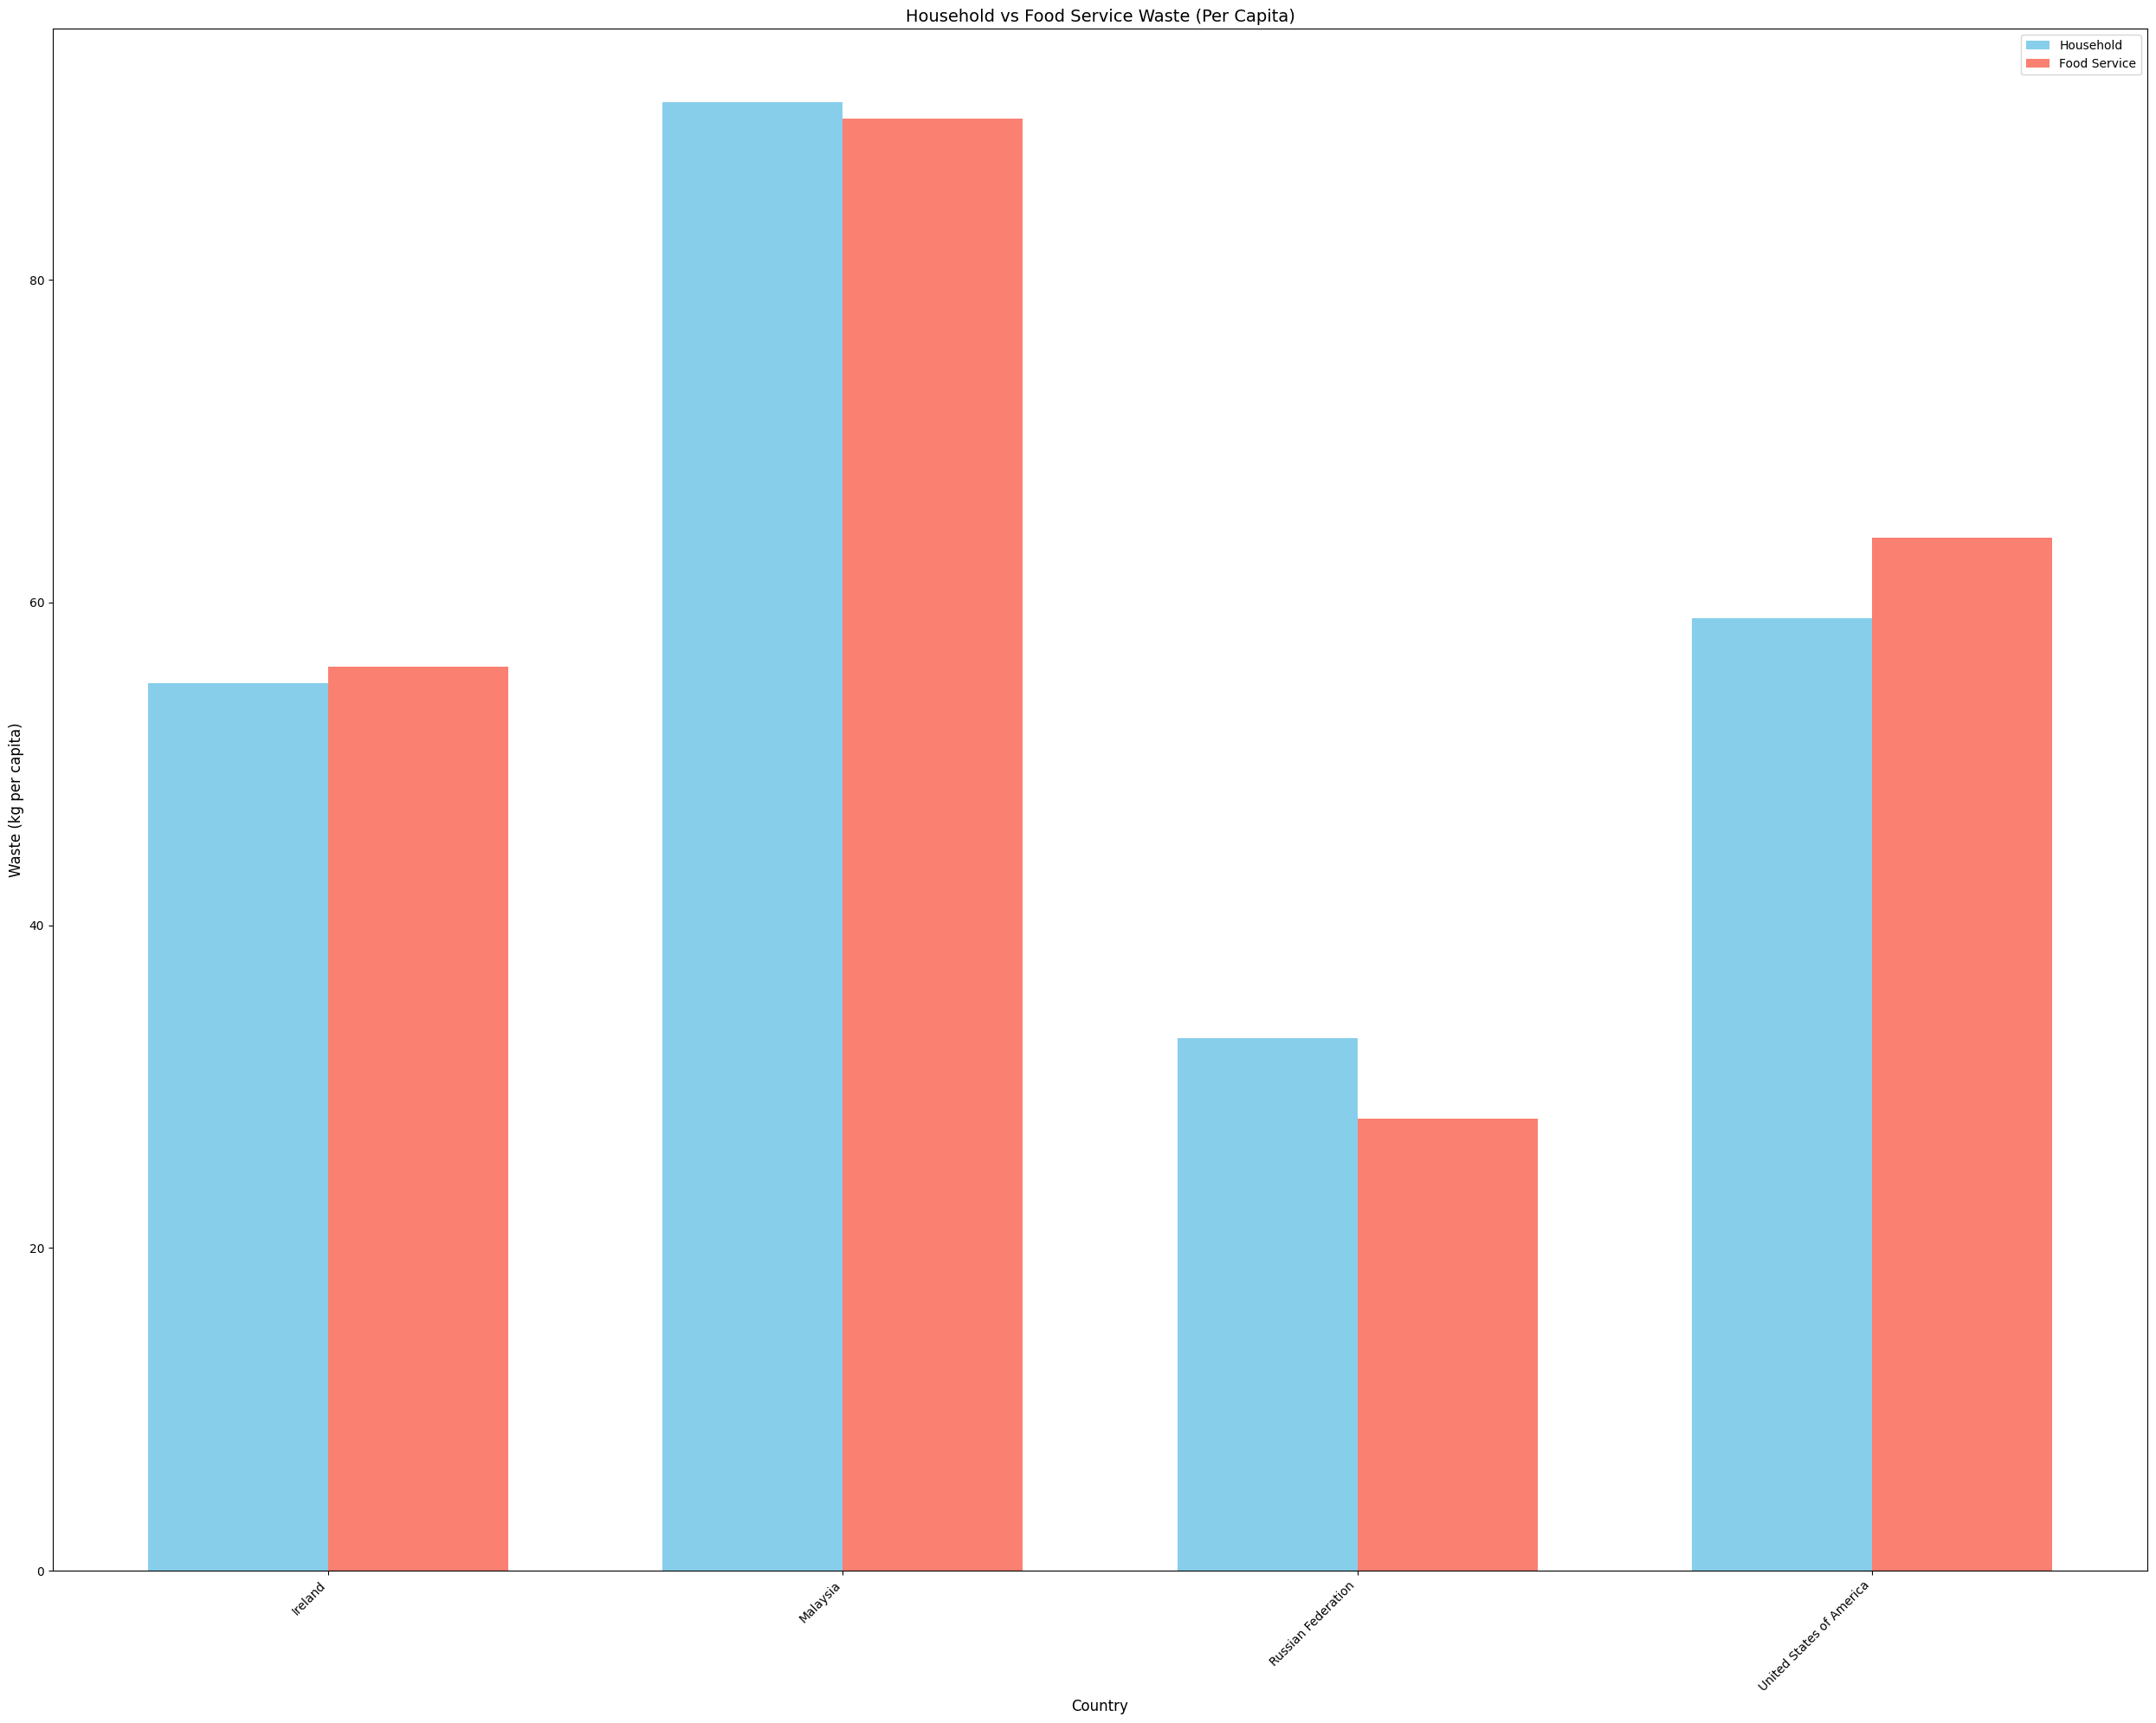

In [201]:
plt.figure(figsize=(25, 20))
plt.bar(x - width/2, result['Household estimate (kg/capita/year)'], width, label='Household', color='skyblue')
plt.bar(x + width/2, result['Food service estimate (kg/capita/year)'], width, label='Food Service', color='salmon')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Waste (kg per capita)', fontsize=12)
plt.title('Household vs Food Service Waste (Per Capita)', fontsize=14)
plt.xticks(x, result['Country'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

In [202]:
df2.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [203]:
query7 = """
SELECT Country, SUM([Total Waste (Tons)]) AS Total_Waste, SUM([Economic Loss (Million $)]) AS Total_Loss
FROM df2
GROUP BY Country
LIMIT 10
"""

In [204]:
result2 = ps.sqldf(query7, locals())

In [205]:
result2

,Country,Total_Waste,Total_Loss
0,Argentina,6082367.52,6132885.94
1,Australia,5887361.29,5927789.11
2,Brazil,6391752.50,6295592.19
3,Canada,6790678.49,6793901.16
4,China,6411096.18,6520823.56
5,France,6334495.00,6243967.47
6,Germany,6760053.01,6730719.94
7,India,6245313.77,6260349.14
8,Indonesia,6294447.74,6275755.68
9,Italy,6207707.28,6206325.49


In [206]:
x = np.arange(len(result2['Country']))
width = 0.4

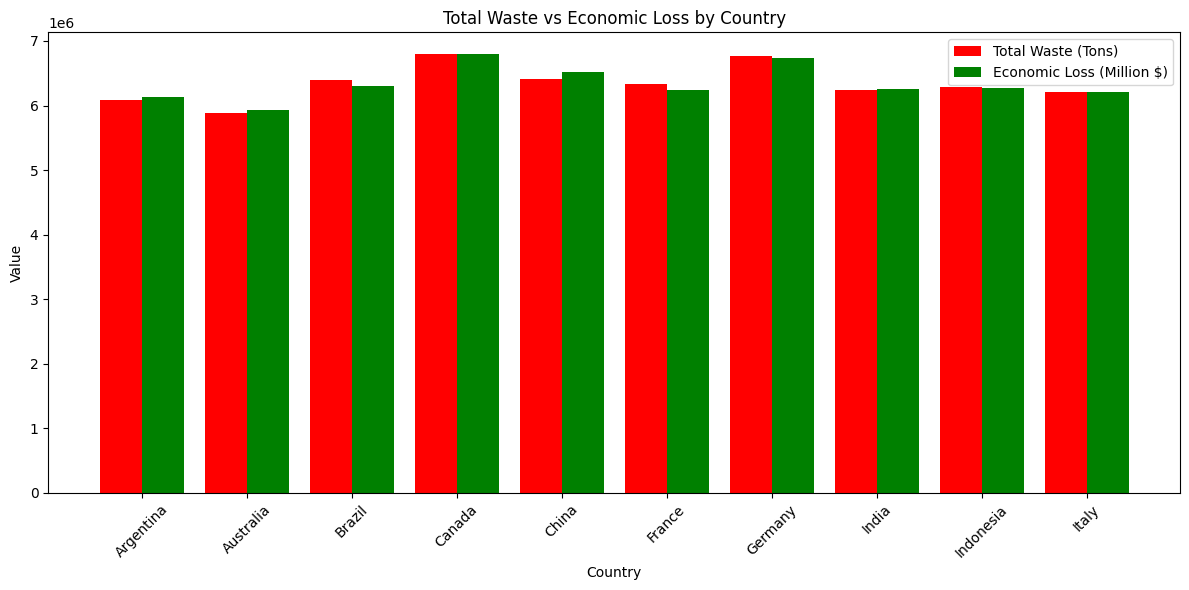

In [207]:
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, result2['Total_Waste'], width, label='Total Waste (Tons)', color='Red')
plt.bar(x + width/2, result2['Total_Loss'], width, label='Economic Loss (Million $)', color='green')
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Total Waste vs Economic Loss by Country')
plt.xticks(x, result2['Country'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [208]:
#Total Waste Changed across different year
query8 = """
SELECT Year,SUM([Total Waste (Tons)]) AS Total_Waste_Tons
FROM df2
GROUP BY Year
ORDER BY Year
"""

In [209]:
result = ps.sqldf(query8, locals())

In [210]:
result

,Year,Total_Waste_Tons
0,2018,17625290.55
1,2019,17527936.61
2,2020,18128400.36
3,2021,18305242.89
4,2022,17107497.90
5,2023,18444672.83
6,2024,18169859.22


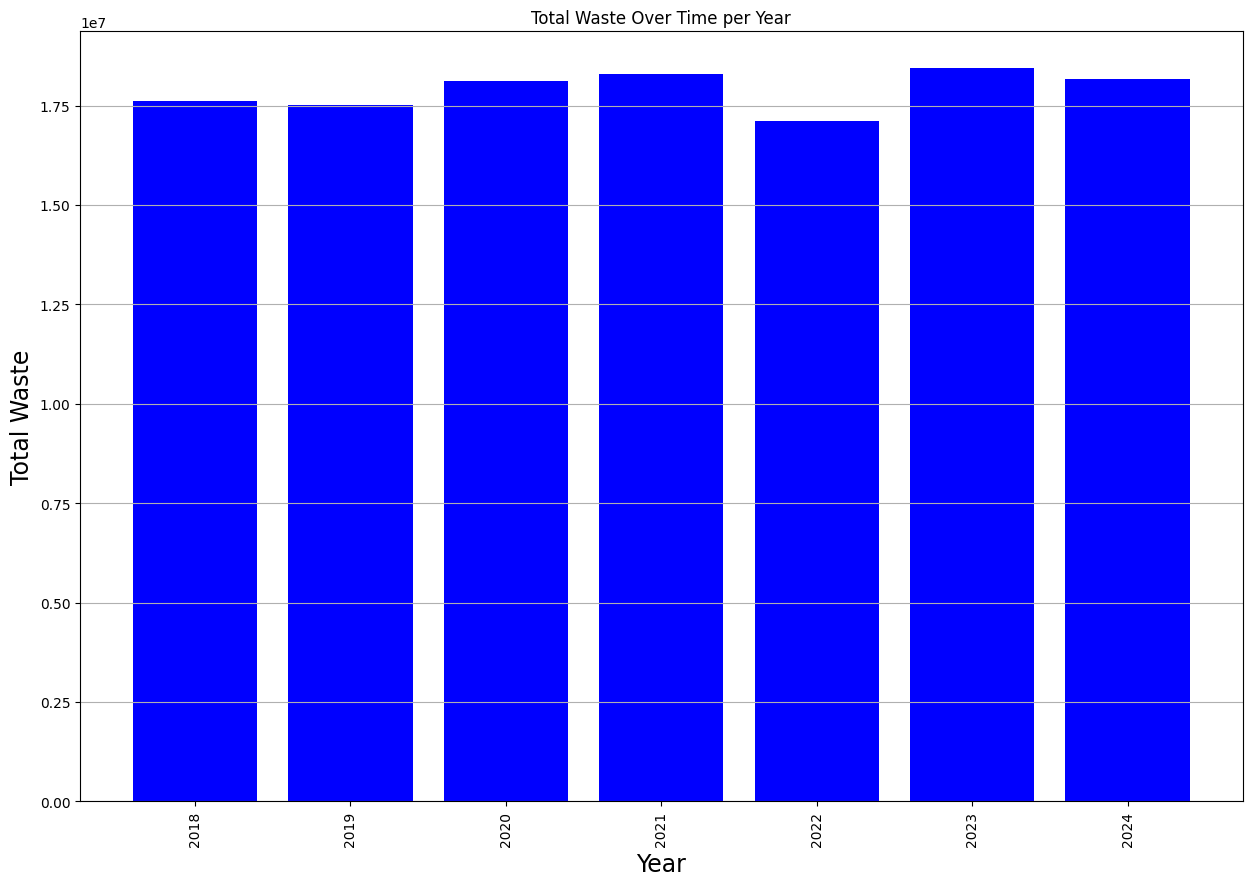

In [211]:
plt.figure(figsize=(15,10))
plt.bar(result["Year"], result['Total_Waste_Tons'], color = 'Blue')
plt.title('Total Waste Over Time per Year', fontsize=12)
plt.xlabel("Year",fontsize=17)
plt.ylabel("Total Waste", fontsize=17)
plt.xticks(rotation=90)
plt.grid(axis='y')

In [212]:
query9 = """
SELECT Year,[Food Category],MAX([Total Waste (Tons)]) AS Max_Waste
FROM df2
GROUP BY Year
"""

In [213]:
result = ps.sqldf(query9, locals())

In [214]:
result

,Year,Food Category,Max_Waste
0,2018,Fruits & Vegetables,49983.05
1,2019,Prepared Food,49948.23
2,2020,Fruits & Vegetables,49940.84
3,2021,Beverages,49873.30
4,2022,Beverages,49956.72
5,2023,Fruits & Vegetables,49990.76
6,2024,Grains & Cereals,49903.52


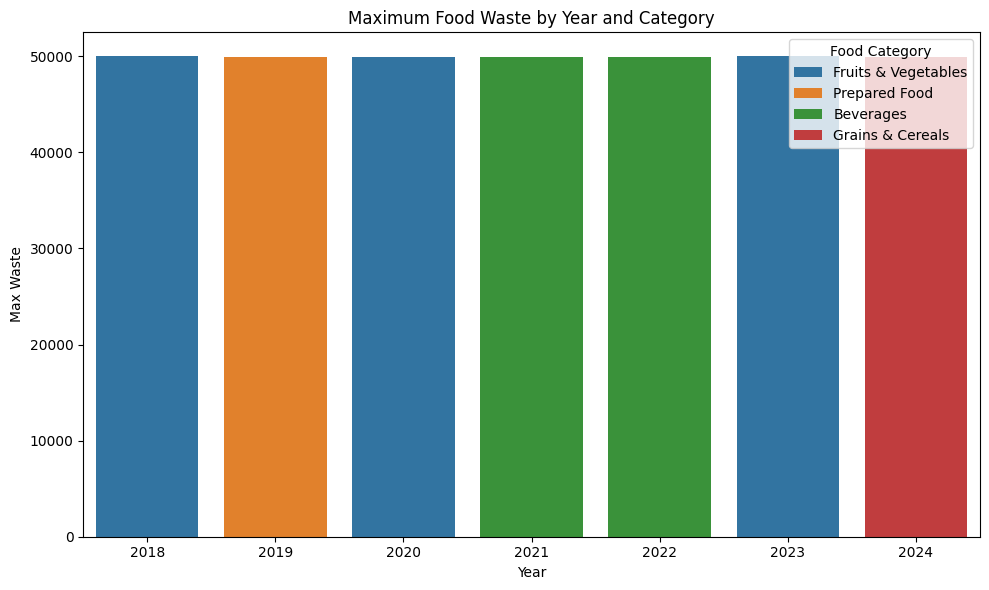

In [215]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='Year', y='Max_Waste', hue='Food Category', dodge=False)
plt.title("Maximum Food Waste by Year and Category")
plt.ylabel("Max Waste")
plt.tight_layout()
plt.show()

In [216]:
query10 = """
SELECT Year, ROUND(AVG([Avg Waste per Capita (Kg)]), 2) AS Avg_Waste_Per_Capita
FROM df2
GROUP BY Year
"""

In [217]:
result = ps.sqldf(query10, locals())

In [218]:
result

,Year,Avg_Waste_Per_Capita
0,2018,108.93
1,2019,107.82
2,2020,110.85
3,2021,107.36
4,2022,110.39
5,2023,109.68
6,2024,111.21


In [219]:
labels = result['Year'].astype(str)
sizes = result['Avg_Waste_Per_Capita']
explode = [0.05] * len(sizes)

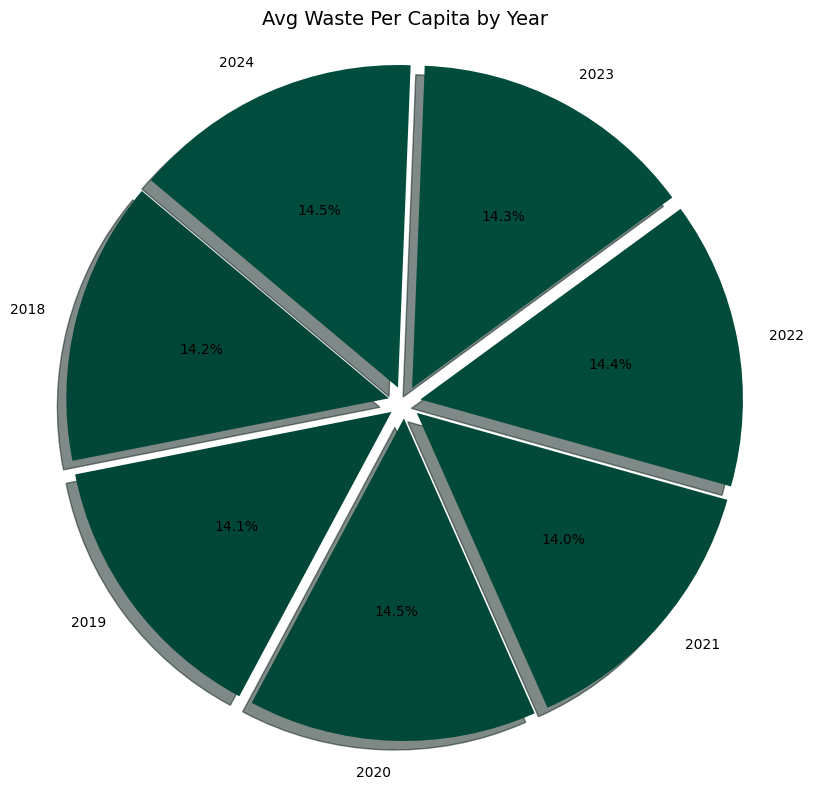

In [220]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140, shadow=True, 
        colors=plt.cm.PuBuGn_r(range(len(sizes))))

plt.title('Avg Waste Per Capita by Year', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [221]:
df2 = df2.sort_values(by=['Year', 'Household Waste (%)'], ascending=[True, False])
highest_per_year = df2.drop_duplicates(subset='Year', keep='first')
print(highest_per_year[['Country', 'Year', 'Household Waste (%)']])

        Country  Year  Household Waste (%)
1528         UK  2018                69.99
4619  Indonesia  2019                69.95
884       Italy  2020                69.99
2961  Argentina  2021                70.00
4949     Russia  2022                69.98
3616     Brazil  2023                69.98
2047  Indonesia  2024                69.99


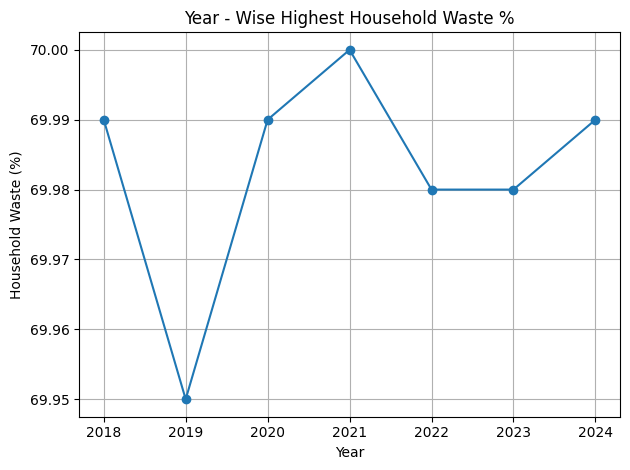

In [222]:
#Line Plot of Yearly Waste % 
max_by_year = df2.loc[df2.groupby('Year')["Household Waste (%)"].idxmax()]
plt.plot(max_by_year['Year'], max_by_year['Household Waste (%)'], marker='o')
plt.title("Year - Wise Highest Household Waste %")
plt.xlabel('Year')
plt.ylabel('Household Waste (%)')
plt.grid(True)
plt.tight_layout()
plt.show()